# Working with Data

The intent of this tutorial is to help familiarize yourself with browsing for data that will be used along with an application to generate data by submitting a job. Job submission will be covered in the next tutorial. Run each cell in order (shift-enter). The notes will indicate when you need to edit code to customize things (e.g., to indicate a data collection)vs. being prompted by running the cell (e.g. for your username and password).

In [10]:
import requests
import getpass
import json
from IPython.display import JSON

from unity_sds_client.unity import Unity
from unity_sds_client.unity_session import UnitySession
from unity_sds_client.unity_services import UnityServices as services
from unity_sds_client.resources.collection import Collection

In [11]:
s = Unity()
# set the venue for interacting with venue specific services
# if your venue id is a single string, use the following
s.set_venue_id("unity-sips-test")

Please enter your Unity username:  gangl
Please enter your Unity password:  ········


## List Available Data Collections in the Unity System

Data is organized into Collections. Any particular data file will be in at least one Collection.

In [12]:
dataManager = s.client(services.DATA_SERVICE)
collections = dataManager.get_collections()
for c in collections:
    print(c.collection_id)


urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___ROB
urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1
urn:nasa:unity:uds_local_test:TEST1:L0_SNPP_EphAtt___1
urn:nasa:unity:uds_local_test:TEST1:L0_SNPP_ATMS_SCIENCE___1
urn:nasa:unity:uds_local_test:TEST1:SNDR_SNPP_ATMS_L1A___1
urn:nasa:unity:uds_local_test:TEST1:CHRP_16_DAY_REBIN___1
urn:nasa:unity:uds_local_test:TEST1:SNDR_SNPP_ATMS_L1A_OUTPUT___1
urn:nasa:unity:uds_local_test:TEST1:SNDR_SNPP_ATMS_L1B_OUTPUT___1


In [14]:
#collection_id = "urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___ROB"
collection_id = "urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1"
cd = dataManager.get_collection_data(Collection(collection_id))
for dataset in cd:
    print(f'dataset name: {dataset.id}' )
    for f in dataset.datafiles:
        print("	" + f.location)

dataset name: urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1:SNDR_tile_2016_s320_S08p25_W040p00_L1_AQ_v1_D_2312151702601986
	s3://ssips-test-ds-storage-reproc/urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1/urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1:SNDR_tile_2016_s320_S08p25_W040p00_L1_AQ_v1_D_2312151702601986.nc/SNDR_tile_2016_s320_S08p25_W040p00_L1_AQ_v1_D_2312151702601986.nc
	s3://ssips-test-ds-storage-reproc/urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1/urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1:SNDR_tile_2016_s320_S08p25_W040p00_L1_AQ_v1_D_2312151702601986.nc/SNDR_tile_2016_s320_S08p25_W040p00_L1_AQ_v1_D_2312151702601986.nc.json
dataset name: urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1:SNDR_tile_2016_s320_N08p25_W175p00_L1_AQ_v1_D_2312151702601994
	s3://ssips-test-ds-storage-reproc/urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1/urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1:SNDR_tile_2016_s320_N08p25_W175p00_L1_AQ_v1_D_2312151702601994.nc/SNDR_tile_2016

## Credential-less data download

When accessing data stores within the same venue, you'll be able to download data from S3 without credentials. 

**Note**, the following libraries are needed for this, and the below command can be run in a jupyter-terminal to install them:

```
conda install xarray netcdf4 hdf5 boto3 matplotlib
```


In [15]:
import sys
!{sys.executable} -m pip install boto3
import boto3

In [16]:
s3 = boto3.client('s3')
#s3://ssips-test-ds-storage-reproc/urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1/urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1:SNDR_tile_2016_s320_N16p50_E120p00_L1_AQ_v1_D_2311021698943223.nc/SNDR_tile_2016_s320_N16p50_E120p00_L1_AQ_v1_D_2311021698943223.nc
s3.download_file('ssips-test-ds-storage-reproc', 'urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1/urn:nasa:unity:ssips:TEST1:CHRP_16_DAY_REBIN___1:SNDR_tile_2016_s320_S38p50_E010p00_L1_AQ_v1_D_2312131702486391.nc/SNDR_tile_2016_s320_S38p50_E010p00_L1_AQ_v1_D_2312131702486391.nc', 'SNDR_tile_2016_s320_S38p50_E010p00_L1_AQ_v1_D_2312131702486391.nc')

The file now should appear in the directory tree to the left in jupyter

In [28]:
!{sys.executable} -m pip install xarray netCDF4 matplotlib
import xarray as xr
import netCDF4

ds = xr.open_dataset('SNDR_tile_2016_s320_S38p50_E010p00_L1_AQ_v1_D_2312131702486391.nc')
ds

<xarray.Dataset>
Dimensions:         (obs: 11280, bnds: 2, wnum: 1679)
Coordinates:
    lat             (obs) float32 ...
    lon             (obs) float32 ...
  * wnum            (wnum) float64 650.0 650.6 651.2 ... 2.549e+03 2.55e+03
Dimensions without coordinates: obs, bnds
Data variables:
    obs_id          (obs) <U20 ...
    obs_time_tai93  (obs) datetime64[ns] ...
    lat_bnds        (bnds) float32 ...
    lon_bnds        (bnds) float32 ...
    land_frac       (obs) float32 ...
    sol_zen         (obs) float32 ...
    sat_zen         (obs) float32 ...
    asc_flag        (obs) float32 ...
    rad             (obs, wnum) float32 ...
    rad_qc          (obs) float32 ...
    total_obs       float64 ...
Attributes:
    algorithm_version:  v1

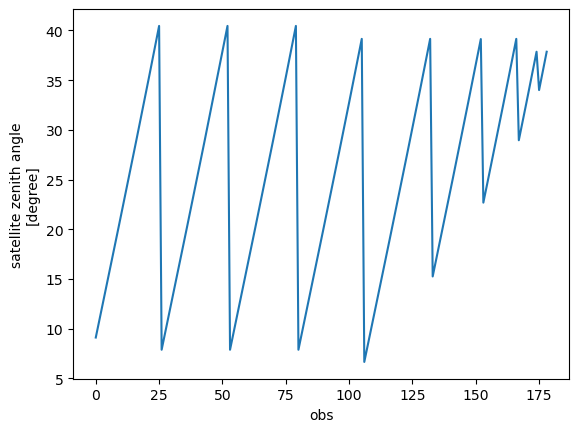

In [30]:
ds["sat_zen"].plot()

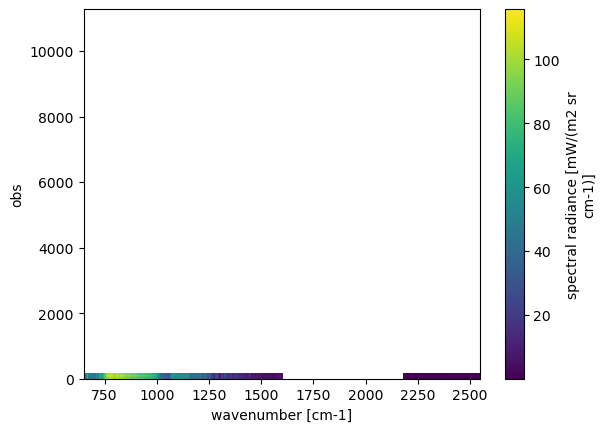

In [31]:
ds["rad"].plot()